In [1]:
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%precision 4
%matplotlib inline
util.scale_plot_size(1.5)
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import IPython.core.display as di
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

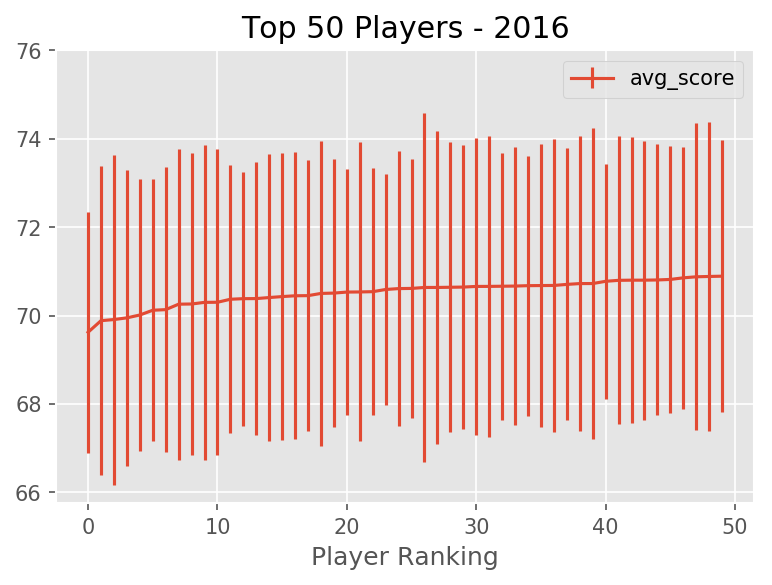

In [2]:
sql_txt = '''
    select avg_score, std_score 
    from stats_view 
    where year = 2016 limit 50;
'''
df = util.pd_from_sql(sql_txt)
plt.errorbar(range(0, len(df)), df['avg_score'], df['std_score'])
y_low, y_high = plt.gca().get_ylim()
plt.gca().set_ylim([y_low,y_high+1])
plt.title('Top 50 Players - 2016', loc='center')
plt.xlabel('Player Ranking')
foo = plt.legend(loc='upper right')

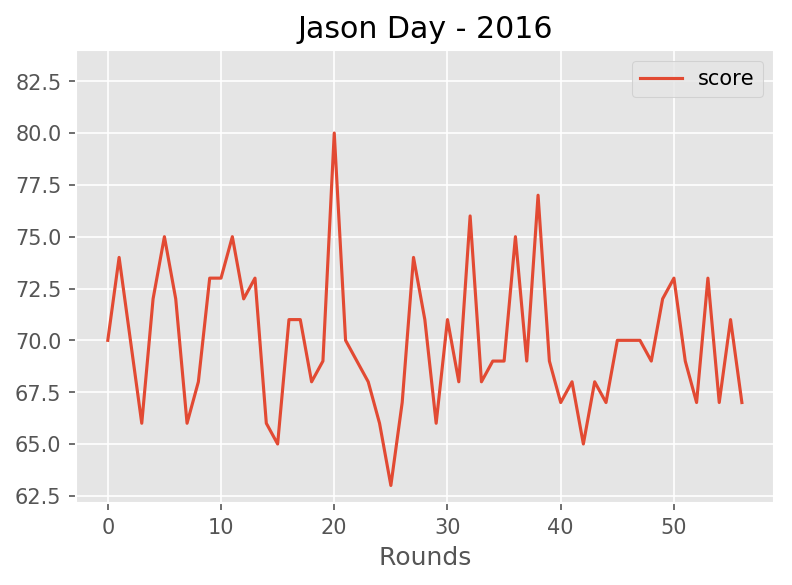

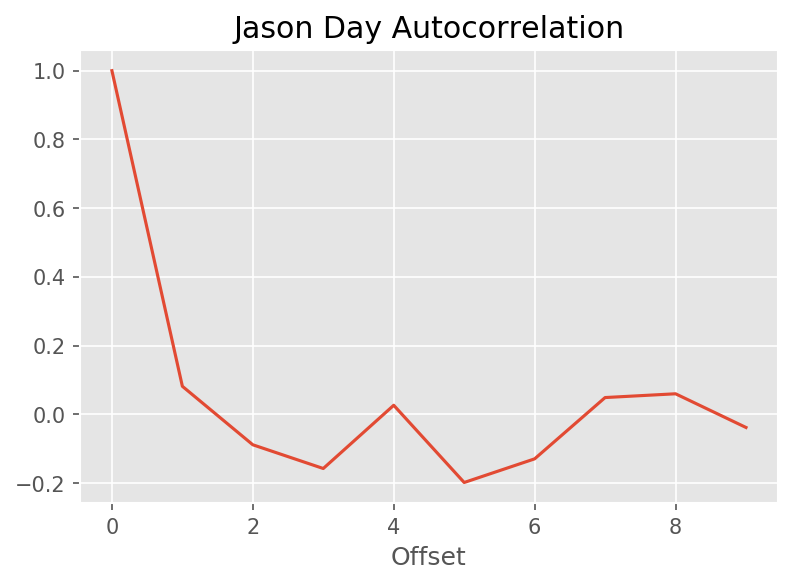

In [7]:
w_series = widgets.Dropdown(options=['select player'] + util.get_players(), value='select player', description='forecast:',disabled=False)
w_series.observe(plot_series, 'value')
display(w_series)

In [6]:
def plot_series(name):
    if type(name) is not str:
        name = name['new']   
    player_df = get_player_series(name)
    min_score, max_score = player_df['score'].min(), player_df['score'].max()
    plt.figure(1)
    plt.plot(range(0, len(player_df)), player_df['score'])
    y_bottom, _ = plt.gca().get_ylim()
    plt.gca().set_ylim([y_bottom,max_score+4])
    plt.title(name + ' - 2016', loc='center')
    plt.legend(loc='upper right')
    plt.xlabel('Rounds')
    plt.figure(2)
    r = range(0, 10)
    plt.title(name + ' Autocorrelation', loc='center')
    plt.xlabel('Offset')
    foo = plt.plot(r, [player_df['score'].autocorr(i) for i in r])

    
def get_player_series(name):
    sql_txt = '''
        select name, permanent_tournament_id, round,  score 
        from players p, scores s
        where p.player_id = s.player_id
        and p.name like %s
        and year = 2016
        order by date;
        '''
    return util.pd_from_sql(sql_txt, [name])


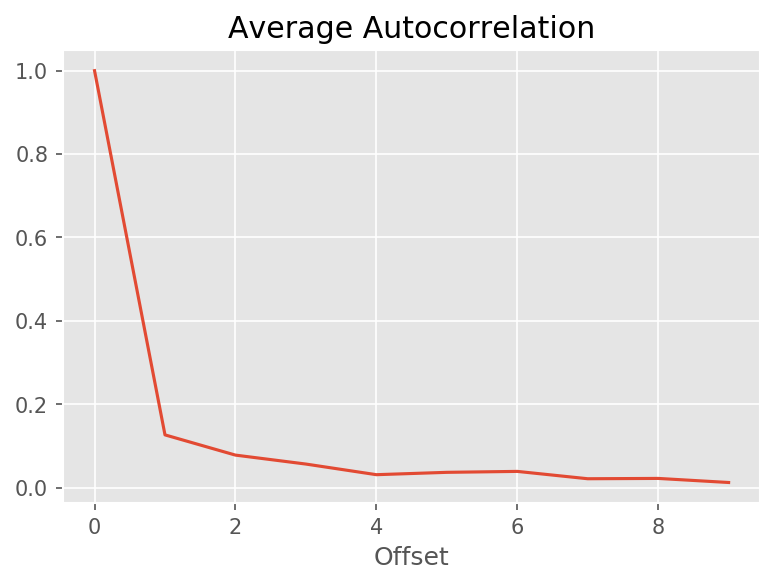

In [78]:
r = range(0, 10)
plt.title('Average Autocorrelation', loc='center')
plt.xlabel('Offset')
foo = plt.plot(r, [get_average_corr(i) for i in r])

def get_average_corr(i):
    def get_corr(name,i):
        df = get_player_series(name)
        return df['score'].autocorr(i)
    return np.mean([get_corr(p, i) for p in util.get_players()])

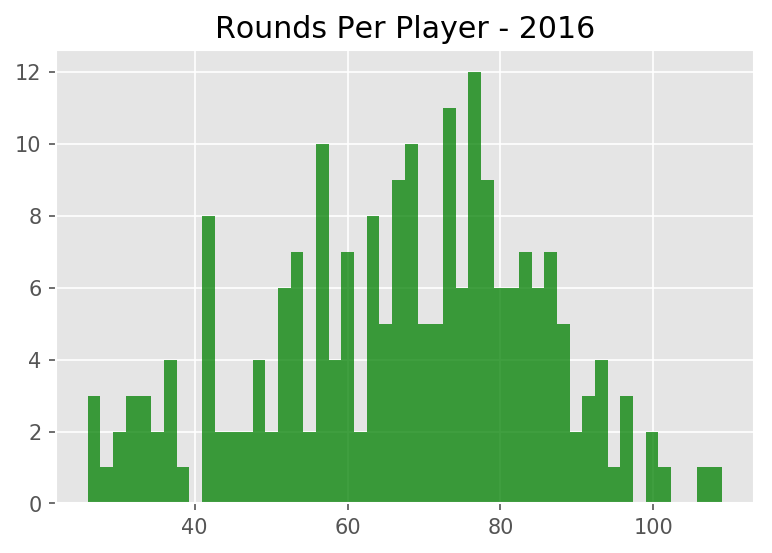

In [8]:
sql_txt = '''
    select player_id, count(*)
    from scores
    where year = 2016
    group by player_id
    having count(*) > 25;
'''
df = util.pd_from_sql(sql_txt)
plt.hist(df['count'].as_matrix().tolist(), 50, facecolor='green', alpha=0.75)
foo = plt.title('Rounds Per Player - 2016')

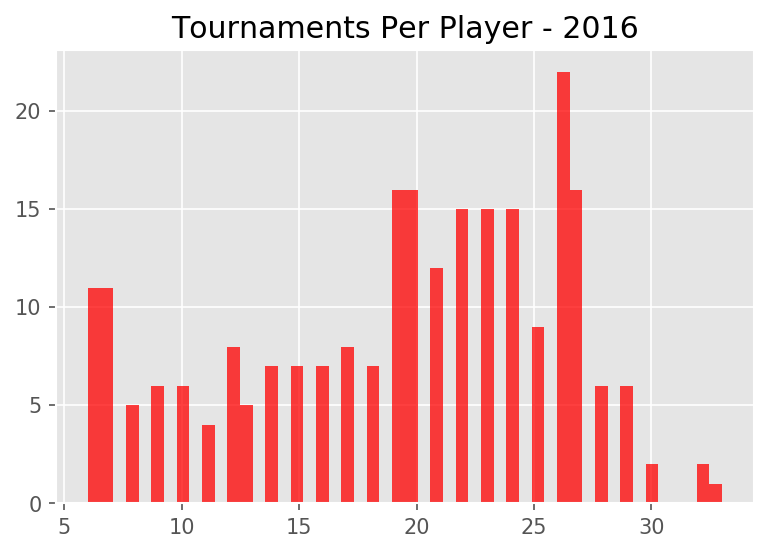

In [48]:
sql_txt = '''
    select player_id, count(distinct(permanent_tournament_id))
    from scores
    where year = 2016
    group by player_id
    having count(distinct(permanent_tournament_id)) > 5;
'''
df = util.pd_from_sql(sql_txt)
plt.hist(df['count'].as_matrix().tolist(), 50, facecolor='red', alpha=0.75)
foo = plt.title('Tournaments Per Player - 2016')